In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import random
import re

In [87]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

In [88]:
# Read from pickled file
df = pd.read_csv(r'C:\Users\user\OneDrive - Seedergy\MAEN\Code\Projects\Courses\Thinkful2020\rfft.csv')

# Ruff Figural Fleucny Test

Abstract.
Provides information about nonverbal capacity for initiation, planning, and divergent reasoning.

##### More info: https://www.parinc.com/Products/Pkey/360

#### Scope & Coverage: All persons aged 15 and over resident within private households, regardless of their nationality, citizenship, language or legal status, in the participating countries.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


In [90]:
df.head(2)

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556


In [91]:
search = []    
for values in df['Measurement']:
    search.append(re.search(r'\d+', values).group())
df['measurement_no'] = search
df['measurement_no'] = df['measurement_no'].astype(str).astype(int)
df['ones'] = 1

In [92]:
df.head(3)

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval,measurement_no,ones
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable,1,1
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556,2,1
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033,3,1


In [93]:
# Make sure all participants have had 3 measurements
pivot = pd.pivot_table(df, values = ['ones'], index=['Casenr'], aggfunc={'ones':'sum'}, fill_value=0, margins=True)
pivot.sort_values(by=['ones'], ascending = True, inplace=True)
pivot.round(0).head(10)

,ones
Casenr,
1,3
1675,3
1676,3
1677,3
1678,3
1679,3
1680,3
1681,3
1682,3


### Get some descriptive statistics for the data

In [94]:
# Numerical describe
df_stat = df.describe(include = [np.number]) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% null'] = df.isnull().mean()
df_stat

,Casenr,Age,Unique,Perseverative,measurement_no,ones
count,7545,7545,7545,7545,7545,7545
mean,1258,52.559,78.1132,11.927,2,1
std,726.066,10.3994,27.1952,14.6272,0.816551,0
min,1,35,13,0,1,1
25%,629,44,57,4,1,1
50%,1258,52,78.5,7.5,2,1
75%,1887,59,97,14,3,1
max,2515,82,161.5,133.5,3,1
dtype,int64,int64,float64,float64,int32,int64
size,7545,7545,7545,7545,7545,7545


In [95]:
# Non-numerical describe
df_stat = df.describe(include = ['O']) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% null'] = df.isnull().mean()
df_stat

,Gender,Education,Measurement,Interval
count,7545,7545,7545,7545
unique,2,4,3,1069
top,Male,4,Measurement 2 (2006-2008),Not applicable
freq,4002,2892,2515,2515
dtype,object,object,object,object
size,7545,7545,7545,7545
% null,0,0,0,0


## 1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [96]:
df1 = df[(df['measurement_no'] == 2) | (df['measurement_no']==3)].copy()

In [97]:
df1['group'] = np.where(df1['measurement_no']==2, 'control', 'treatment')


In [98]:
df1.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval,measurement_no,ones,group
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556,2,1,control
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033,3,1,treatment
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362,2,1,control
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483,3,1,treatment
7,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),83.5,21.0,2.628552653,2,1,control


In [99]:
# How large is each group?
print('test sample size:', len(df1[df1.group == 'treatment']))
print('control sample size:', len(df1[df1.group == 'control']))
print('test proportion:', len(df1[df1.group == 'treatment'])/ len(df1))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(df1[df1.group == 'treatment'].Unique,
                df1[df1.group == 'control'].Unique)

test sample size: 2515
control sample size: 2515
test proportion: 0.5



Ttest_indResult(statistic=5.172289431795646, pvalue=2.4021740879907784e-07)

### p-value is smaller than 0.5 and we need to check for normalty assumption: Visually and with Shapiro-Wilk test statistic

DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)
(0.9909505248069763, 1.7879258837338874e-11)


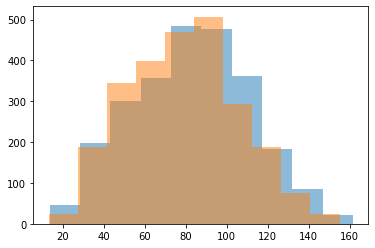

In [100]:
print(stats.describe(df1[df1.group == 'treatment'].Unique))
print(stats.shapiro(df1[df1.group == 'control'].Unique))
plt.hist(df1[df1.group == 'treatment'].Unique, alpha = .5)
plt.hist(df1[df1.group == 'control'].Unique, alpha = .5)
plt.show()

### The shape is very similar to a perfect bell-shape however a W statistc close to 1 indicates that the distribution is similar to a normal distribution which is also the case

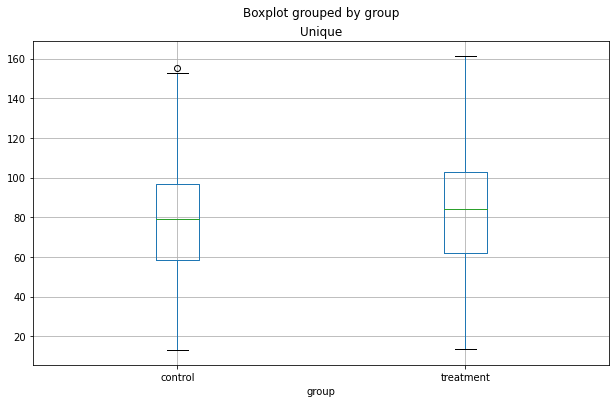

In [101]:
#Create a boxplot
df1.boxplot('Unique', by='group', figsize=(10, 6))

## 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

DescribeResult(nobs=2515, minmax=(0.0, 124.0), mean=12.100198807157058, variance=187.75009940357853, skewness=3.03381078165085, kurtosis=13.347862924837408)


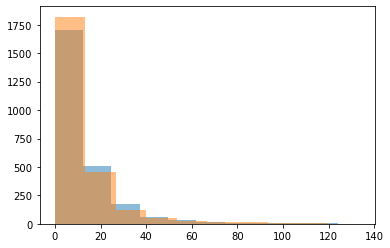

(0.6725998520851135, 0.0)


In [102]:
print(stats.describe(df1[df1.group == 'treatment'].Perseverative))

plt.hist(df1[df1.group == 'treatment'].Perseverative, alpha = .5)
plt.hist(df1[df1.group == 'control'].Perseverative, alpha = .5)
plt.show()
print(stats.shapiro(df1[df1.group == 'control'].Perseverative))

### Perservative does not appear normally distributed and p-value is zero. We need to use Kruskal-Wallis Test for a non-parametric test

In [103]:
stats.kruskal(df1[df1.group == 'control'].Perseverative, df1[df1.group == 'treatment'].Perseverative)

KruskalResult(statistic=4.888785605096552, pvalue=0.027031693666595576)

### Based on the p-value, we fail to reject the null that there is a significant difference in the number of perseverative errow drawn by the same participant